In [1]:
import torch
from config.eval.mnist import get_config as get_eval_config
import lib.utils.bookkeeping as bookkeeping
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import lib.models.models as models
import lib.models.model_utils as model_utils
import lib.datasets.datasets as datasets
import lib.datasets.dataset_utils as dataset_utils
import lib.losses.losses as losses
import lib.losses.losses_utils as losses_utils
import lib.training.training as training
import lib.training.training_utils as training_utils
import lib.optimizers.optimizers as optimizers
import lib.optimizers.optimizers_utils as optimizers_utils
import lib.loggers.loggers as loggers
import lib.loggers.logger_utils as logger_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils
import os

2023-09-04 17:23:06.745238: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# creating paths
path = '/Users/paulheller/PythonRepositories/Master-Thesis/ContTimeDiscreteSpace/tauLDR/SavedModels/MNIST/'
date = '2023-09-04'
config_name = 'config_001.yaml'
model_name = 'ckpt_0000004999.pt'

config_path = os.path.join(path, date, config_name)
checkpoint_path = os.path.join(path, date, model_name)

In [4]:
# creating models
cfg = bookkeeping.load_config(config_path)
print(cfg)

device = torch.device(cfg.device)

model = model_utils.create_model(cfg, device)
print("number of parameters: ", sum([p.numel() for p in model.parameters()]))


#optimizer = optimizers_utils.get_optimizer(model.parameters(), cfg)
optimizer = torch.optim.Adam(model.parameters(), cfg.optimizer.lr)

sampler = sampling_utils.get_sampler(cfg)

state = {"model": model, "optimizer": optimizer, "n_iter": 0}
state = bookkeeping.load_state(state, checkpoint_path)

data:
  S: 256
  batch_size: 64
  download: true
  name: DiscreteMNIST
  random_flips: true
  root: /Users/paulheller/PythonRepositories/Master-Thesis/ContTimeDiscreteSpace/tauLDR/lib/datasets/MNIST
  shape: !!python/object/new:ruamel.yaml.comments.CommentedSeq
    listitems:
    - 1
    - 32
    - 32
    state:
      _yaml_format: !!python/object/new:ruamel.yaml.comments.Format
        state: !!python/tuple
        - null
        - _flow_style: false
      _yaml_line_col: !!python/object:ruamel.yaml.comments.LineCol
        col: 2
        data:
          0:
          - 9
          - 4
          1:
          - 10
          - 4
          2:
          - 11
          - 4
        line: 9
  shuffle: true
  train: true
device: cpu
distributed: false
experiment_name: mnist
init_model_path: null
loss:
  eps_ratio: !!python/object/new:ruamel.yaml.scalarfloat.ScalarFloat
    args:
    - 1.0e-09
    state:
      _e_sign: true
      _e_width: 3
      _exp: e
      _m_lead0: 0
      _m_sign: false


In [5]:
n_samples = 9
samples, x_hist, x0_hist = sampler.sample(model, n_samples, 10)
samples = samples.reshape(n_samples, 1, 32, 32)

1000it [10:45,  1.55it/s]


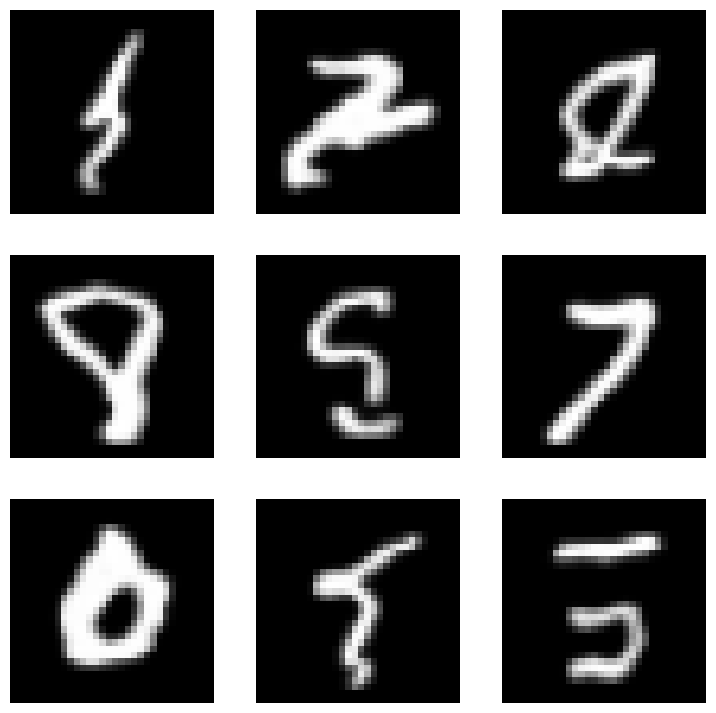

In [7]:
fig = plt.figure(figsize=(9, 9))  
for i in range(n_samples):
    plt.subplot(3, 3, 1 + i)
    plt.axis("off")
    plt.imshow(np.transpose(samples[i, ...], (1,2,0)), cmap="gray")


plt.savefig(f"/Users/paulheller/PythonRepositories/Master-Thesis/ContTimeDiscreteSpace/tauLDR/SavedModels/MNIST/PNGs/samples_epoch{state['n_iter']}.png")
plt.show()
plt.close()